In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Lista de nombres de tus archivos CSV
file_names = ['EXP01.csv', 'EXP02.csv', 'EXP03.csv', 'EXP04.csv', 'EXP05.csv', 'EXP06.csv', 'EXP07.csv']

# DataFrame vacío para almacenar todos los datos consolidados
all_data = pd.DataFrame()

for i, file in enumerate(file_names):
    try:
        # Carga cada archivo CSV
        df = pd.read_csv(file)

        # Agrega una columna para identificar el experimento
        df['experimento'] = f'Experimento {i+1}'

        # Agrega el DataFrame actual al DataFrame consolidado
        all_data = pd.concat([all_data, df], ignore_index=True)
    except FileNotFoundError:
        print(f"Advertencia: El archivo {file} no se encontró.")

# Muestra el DataFrame consolidado para verificar
print(all_data.head())
print("\nDataFrame consolidado creado exitosamente.")

   epoca  perdida_entrenamiento  precision_entrenamiento  perdida_validacion  \
0      1                 2.3493                    13.53              2.1928   
1      2                 2.1216                    22.71              2.0587   
2      3                 1.9995                    27.52              1.9470   
3      4                 1.8254                    38.20              1.7711   
4      5                 1.6664                    43.31              1.6759   

   precision_validacion    experimento  
0                 19.28  Experimento 1  
1                 24.10  Experimento 1  
2                 27.71  Experimento 1  
3                 34.94  Experimento 1  
4                 36.14  Experimento 1  

DataFrame consolidado creado exitosamente.


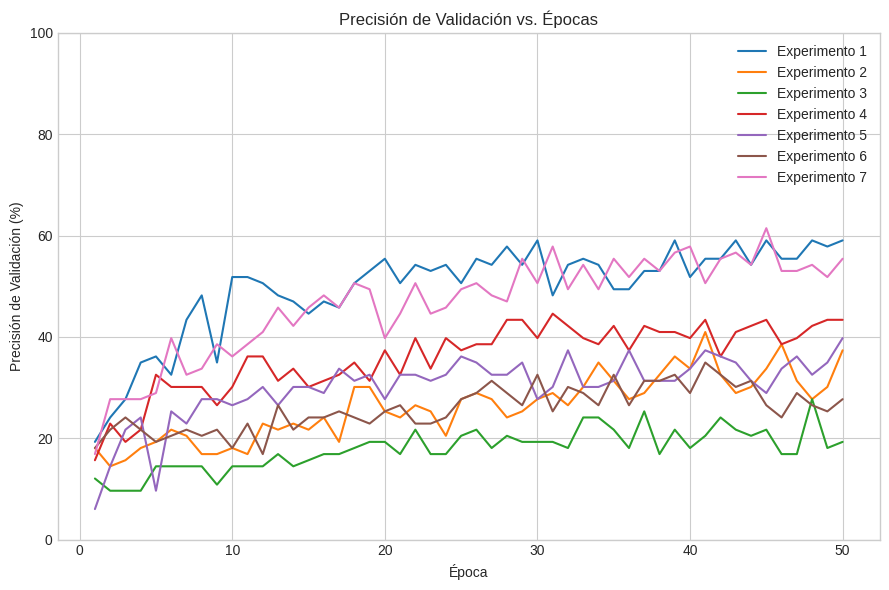

In [7]:
# Crear la gráfica
plt.style.use('seaborn-v0_8-whitegrid')
fig, (ax1) = plt.subplots(1, figsize=(9, 6))

# Gráfica de Precisión de Validación
for exp in all_data['experimento'].unique():
    exp_data = all_data[all_data['experimento'] == exp]
    ax1.plot(exp_data['epoca'], exp_data['precision_validacion'], label=exp)

ax1.set_title('Precisión de Validación vs. Épocas')
ax1.set_xlabel('Época')
ax1.set_ylabel('Precisión de Validación (%)')
ax1.legend()
ax1.set_ylim(0, 100)

plt.tight_layout()
plt.show()

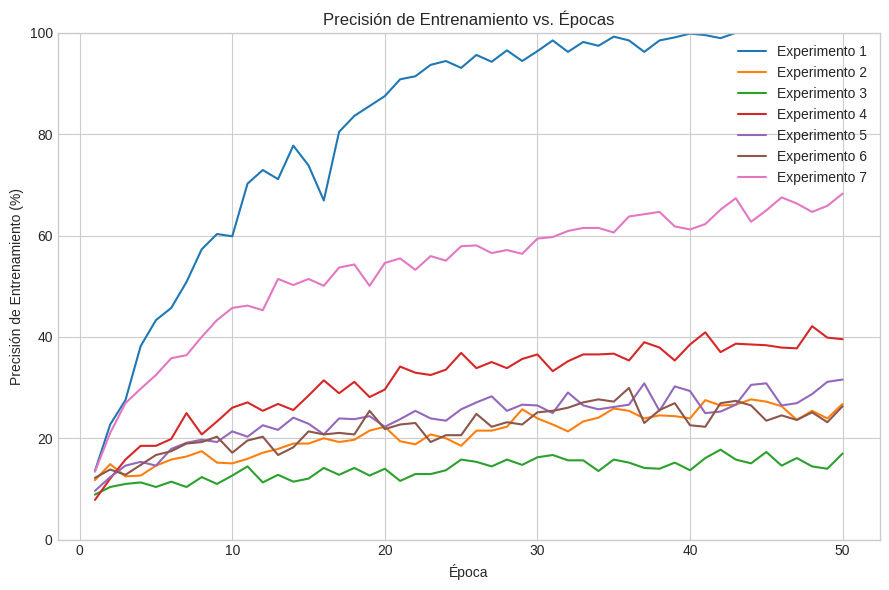

In [8]:
# Crear la gráfica
plt.style.use('seaborn-v0_8-whitegrid')
fig, (ax1) = plt.subplots(1, figsize=(9, 6))

# Gráfica de Precisión de Entrenamiento
for exp in all_data['experimento'].unique():
    exp_data = all_data[all_data['experimento'] == exp]
    ax1.plot(exp_data['epoca'], exp_data['precision_entrenamiento'], label=exp)

ax1.set_title('Precisión de Entrenamiento vs. Épocas')
ax1.set_xlabel('Época')
ax1.set_ylabel('Precisión de Entrenamiento (%)')
ax1.legend()
ax1.set_ylim(0, 100)

plt.tight_layout()
plt.show()